<h1 style="text-align:center;">ZOMATO DATA ANALYSIS USING PYTHON</h1>

> The objective of this project is to understand how people choose restaurants on Zomato by analyzing ratings, online ordering, table booking, and spending patterns. Through this analysis, we aim to identify customer preferences and determine what makes a restaurant more trustworthy and popular.

### IMPORTING THE LIBRARIES

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [211]:
# Lets import the data first
df = pd.read_csv("zomato-data-.csv")

df.head() # Checking the data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### CLEANING THE DATA

In [60]:
# Now, as we can see that the rating isn't correct.
# We have to convert it into floating values.

# 1. First, we are defining a function
# 2. 'handleRate' is the function name
# 3. Now, we are splitting the 'rate' value
# 4. Since we don't need the last part, we select only value[0]
# 5. because indexing in Python starts from 0


def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=dataframe['rate'].apply(handleRate)

In [61]:
# Now let's verify whether it is perfectly done or not

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [62]:
# Lets verify the object type as well.
# for that will be using info()
# and now can clearly see that rate has been successfully converted into the float

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [63]:
# Now, lets check if we can find any null values as well
# There is 0 (zero) null values
# Lets move on to the next part

df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### FINDING THE TYPES OF RESTAURANTS

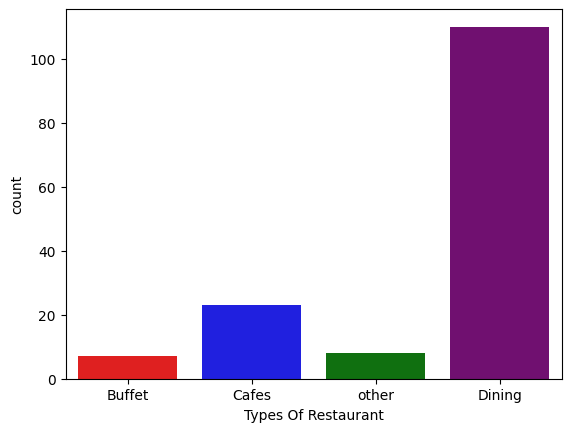

In [174]:
colors = ['red', 'blue', 'green', 'purple']

sns.countplot(x=df['listed_in(type)'], palette=colors) # using palette so that I can get diff. colours else blue
plt.xlabel("Types Of Restaurant")
plt.xticks(rotation=360) # so that I can get better labels
plt.show()

> Now, as we can see that most of the restaurants fall into the **dining** category.

### CUSTOMER VOTE ON TYPES OF RESTAURANTS

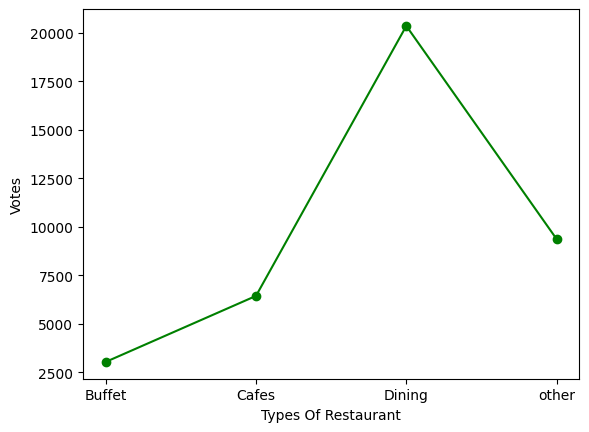

In [103]:
# Let's check the votes for each category

group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': group_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Types Of Restaurant')
plt.ylabel('Votes')
plt.xticks(rotation=360)
plt.show()

> Clearly we can see that again **Dining** restaurants are preferred by a larger number of individuals.

### Identifying the Most Voted Restaurant

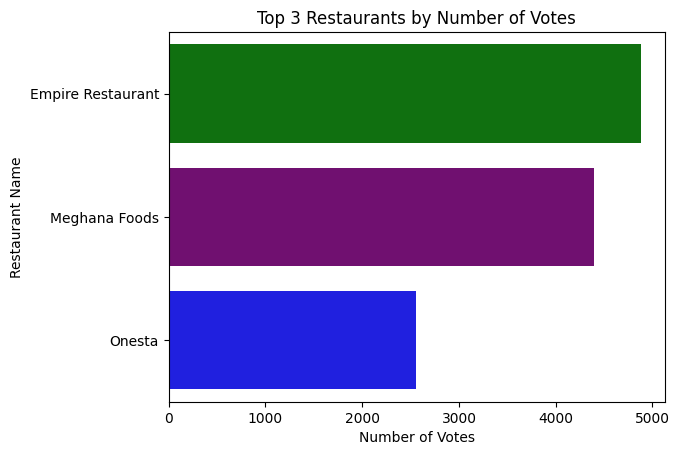

In [178]:
# Let's get the top 3 restaurants by votes

top_three_restaurants = df[['name', 'votes']].nlargest(3, 'votes')

# Visualizing
sns.barplot(
    x='votes',
    y='name',
    data=top_three_restaurants,
    palette=['green', 'purple', 'blue']
)
plt.xlabel('Number of Votes')
plt.ylabel('Restaurant Name')
plt.title('Top 3 Restaurants by Number of Votes')
plt.show()

### Ratings Comparison - Online vs Offline Orders

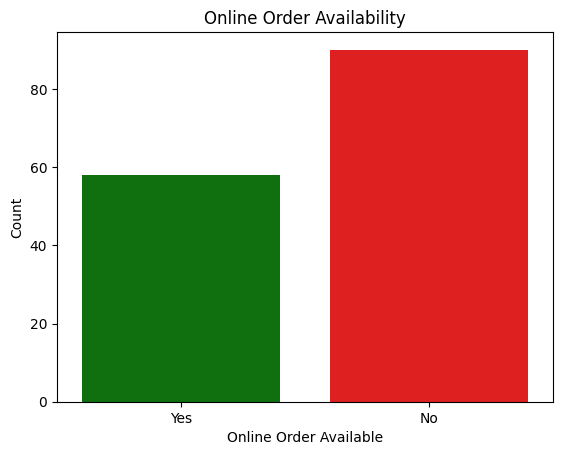

In [173]:
sns.countplot(
    x='online_order',
    data=df,
    order=['Yes', 'No'],
    palette={'Yes': 'green', 'No': 'red'}
)

plt.xlabel('Online Order Available')
plt.ylabel('Count')
plt.title('Online Order Availability')
plt.show()

> This suggesting that most of them still **do not support online orders**

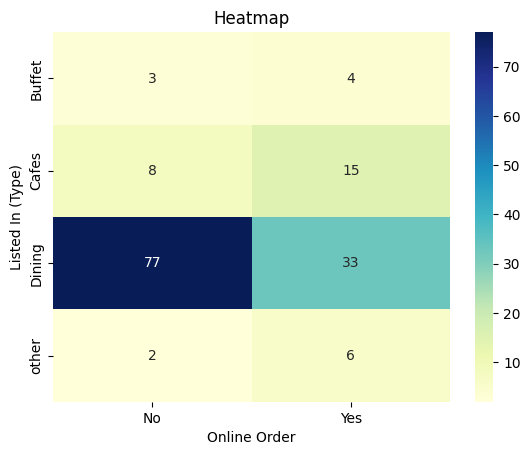

In [199]:
# The heatmap shows the distribution of restaurant types based on online order availability.

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

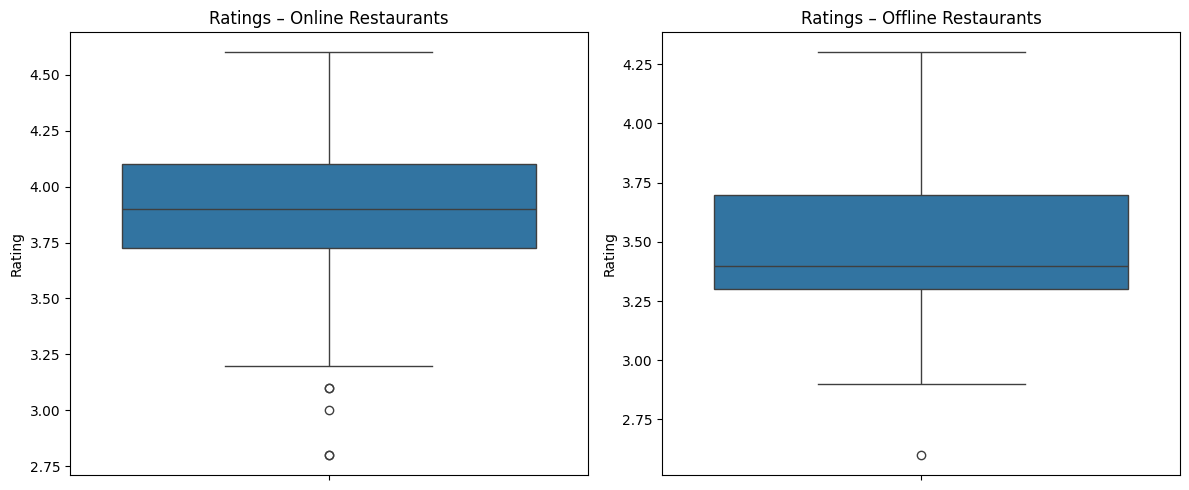

In [180]:
# Now, lets see-
# Which one is actually performing better - Online or Offline?
# And what's their ratings

# Splitting the data
online_df = df[df['online_order'] == 'Yes']
offline_df = df[df['online_order'] == 'No']

# Creating two separate boxes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=online_df['rate'])
plt.title('Ratings – Online Restaurants')
plt.ylabel('Rating')

plt.subplot(1, 2, 2)
sns.boxplot(y=offline_df['rate'])
plt.title('Ratings – Offline Restaurants')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

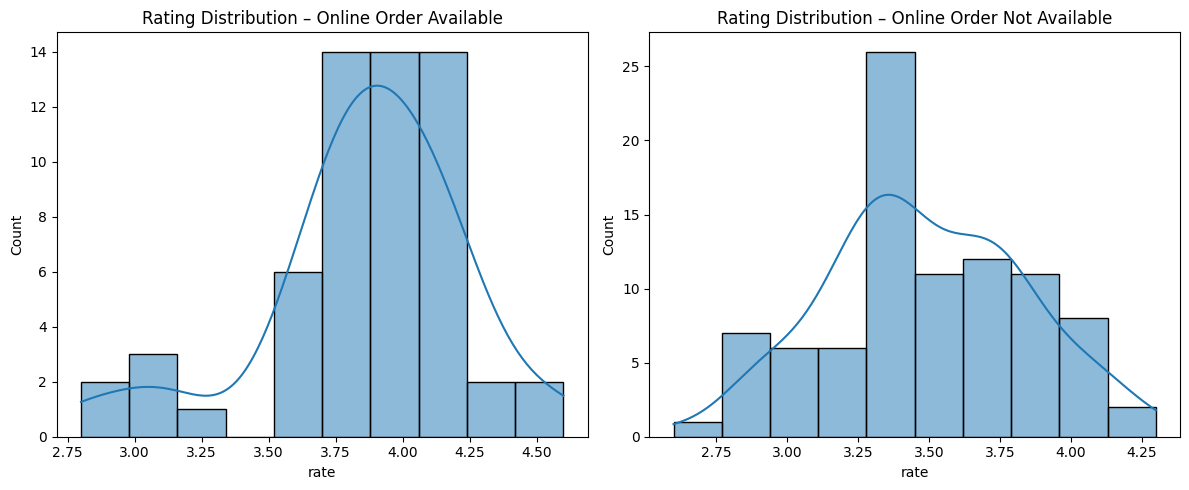

In [181]:
# From the above distributions, we can observe that restaurants offering online orders
# tend to have ratings concentrated in the higher range (around 3.5–4.15),
# indicating better overall customer satisfaction.
#
# In contrast, restaurants without online ordering show a wider spread of ratings,
# including more lower-rated values, which suggests inconsistency in service quality.
#
# Therefore, restaurants with online ordering appear to be more reliable and trustworthy based on customer ratings.

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(online_df['rate'], kde=True)
plt.title('Rating Distribution – Online Order Available')

plt.subplot(1, 2, 2)
sns.histplot(offline_df['rate'], kde=True)
plt.title('Rating Distribution – Online Order Not Available')

plt.tight_layout()
plt.show()

# Average Cost for Couples

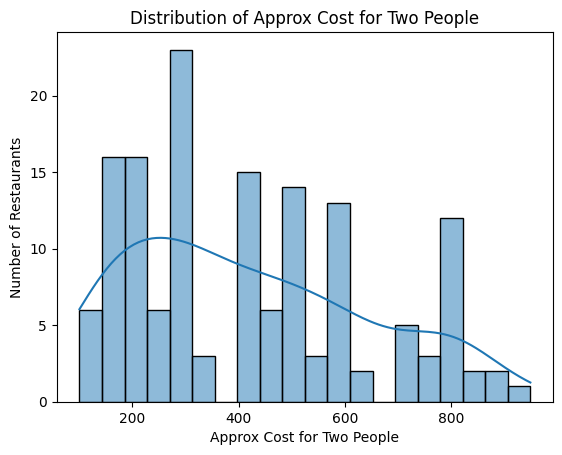

In [200]:
# Visualizing the distribution of approximate cost for two people

sns.histplot(
    df['approx_cost(for two people)'],
    bins=20,
    kde=True
)

plt.xlabel('Approx Cost for Two People')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Approx Cost for Two People')
plt.show()

### Average cost for two people based on table booking availability

In [207]:
avg_spending_df = avg_spending.reset_index()
avg_spending_df.columns = ['Table Booking', 'Average Cost for Two']

avg_spending_df

,Table Booking,Average Cost for Two
0,No,402.50
1,Yes,693.75


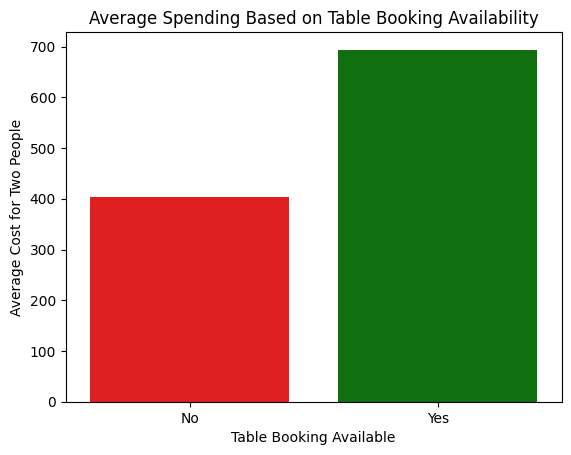

In [209]:
sns.barplot(
    x='Table Booking',
    y='Average Cost for Two',
    data=avg_spending_df,
    palette={'Yes': 'green', 'No': 'red'}
)

plt.xlabel('Table Booking Available')
plt.ylabel('Average Cost for Two People')
plt.title('Average Spending Based on Table Booking Availability')
plt.show()

> Restaurants that support **table booking have a higher average cost for two people**,
> 
> indicating that **customers tend to spend more at restaurants** offering reservation facilities.
>
> In contrast, restaurants without table booking are generally more affordable.